# Herman Franclin Tesso Tassang

#Source code : Applied Machine Learning at scale

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/ml-latest-small')

In [4]:
#@title dependencies
import pandas as pd
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import random

In [5]:
#@title import data
#file_path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/ml-latest-small/ratings.csv' # small dataset
file_path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/ml-25m/ratings.csv'
data=pd.read_csv(file_path,sep=',',header=0)
data.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [ ]:
data.shape

(25000095, 4)

In [ ]:
data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [6]:
#@title users and movies Id
users=data['userId'].unique()   # users ID
items=data['movieId'].unique()  # Movies ID
M=len(users)                    # number of users
N=len(items)                    # number of items (movies)


In [7]:
#@title movies file
file_path1='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/ml-25m/movies.csv'
movies=pd.read_csv(file_path1,sep=',',header=0)
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#Pratical 1

## code indexing

In [8]:
#@title .
import pickle
path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/total_list_samples.pkl'
with open(path, 'rb') as f:
    samples = pickle.load(f)

In [ ]:
#@title data structures

samples=[]
# Create list of observed user_index-movie_index-rating
for m in tqdm(range(M)):
    mask=data['userId']==users[m]
    movies_u=list(data['movieId'][mask])
    rate_u=list(data['rating'][mask])
    for mov,r in zip(movies_u,rate_u):
        n=np.where(items==mov)[0][0]
        samples.append((m,n,r))


users_struct = [[] for i in range(M)] # list of list of tuple (item_index ,rating) for each user "m"
movies_struct= [[] for i in range(N)] # list of list of tuple (user_index ,rating) for each item "n"

for (user_index, movie_index, rating) in samples:
  users_struct[user_index].append((movie_index, rating))
  movies_struct[movie_index].append((user_index, rating))

In [9]:

users_struct = [[] for i in range(M)] # list of list of tuple (item_index ,rating) for each user "m"
movies_struct= [[] for i in range(N)] # list of list of tuple (user_index ,rating) for each item "n"

for (user_index, movie_index, rating) in samples:
  users_struct[user_index].append((movie_index, rating))
  movies_struct[movie_index].append((user_index, rating))

In [ ]:
print('lenght of samples list (user_index,movie_index,rate) :',len(samples))
print('')
print('lenght of the users_struct list:', len(users_struct))
print('')
print('lenght of the items_struct list:', len(movies_struct))

lenght of samples list (user_index,movie_index,rate) : 25000095

lenght of the users_struct list: 162541

lenght of the items_struct list: 59047


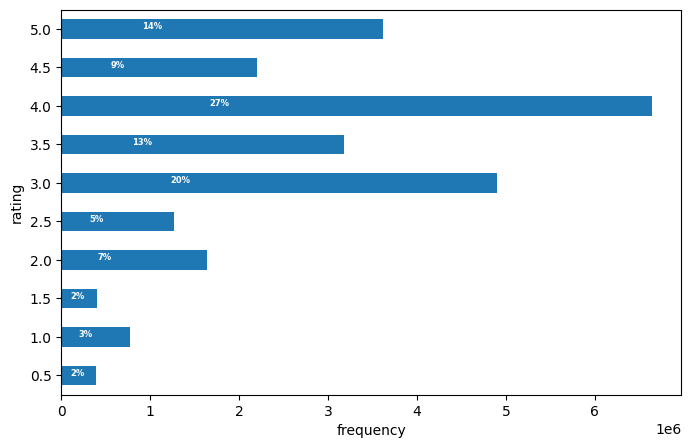

In [10]:
#@title rating distributions

rating_freq= data.groupby('rating')['rating'].agg(['count'])
ax = rating_freq.plot(kind = 'barh', legend = False, figsize = (8,5))
#plt.title('Total : {:,} Movies, {:,} users'.format(N, M), fontsize=16)
#plt.axis('off')
plt.xlabel('frequency')
n=rating_freq.shape[0]+1
for i in range(1,n):
    ax.text(rating_freq.iloc[i-1][0]/4, i-1,  '{:.0f}%'.format( rating_freq.iloc[i-1][0]*100 / rating_freq.sum()[0]), color = 'white', weight = 'bold',fontsize=6)

plt.savefig('fig1.pdf', format='pdf',bbox_inches='tight')

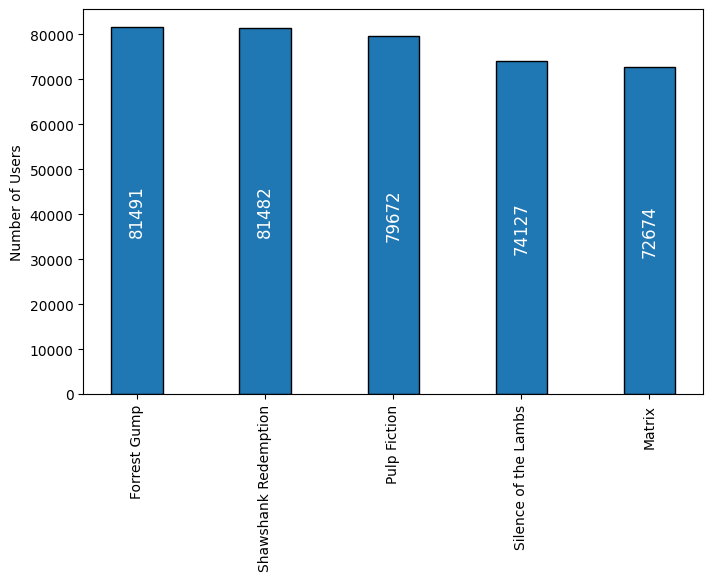

the 5 most popular movies in the dataset:



,title,genres
292,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
314,"Shawshank Redemption, The (1994)",Crime|Drama
351,Forrest Gump (1994),Comedy|Drama|Romance|War
585,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2480,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [13]:
#@title most popular movies
frequence=[len(x) for x in movies_struct]


# Sort the indices based on the values in descending order
sorted_indices= sorted(range(len(frequence)), key=lambda i: frequence[i], reverse=True)

# Get the indices of the top 5 highest frequences
top_5_indices = sorted_indices[:5]
#corresponding Id
Id=items[top_5_indices]

freq=np.array(frequence)[top_5_indices]
label=[]
for id in Id:
  label.append(movies[['title']][movies['movieId']==id].values[0,0] )


label1=[label[0][:-7],label[1][:-12],label[2][:-7],label[3][:-12],label[4][:-12]]


plt.figure(figsize=(8, 5))
bars = plt.bar(label1, freq, edgecolor='black', width=0.4)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Number of Users')

# Add labels inside the bars
for bar, frequency in zip(bars, freq):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{frequency}', ha='center', va='center', color='white', fontsize=12,rotation=90)
plt.savefig('fig3.pdf', format='pdf',bbox_inches='tight')
plt.show()

print('the 5 most popular movies in the dataset:')
print('')
movies[['title','genres']][movies['movieId'].isin(Id)]

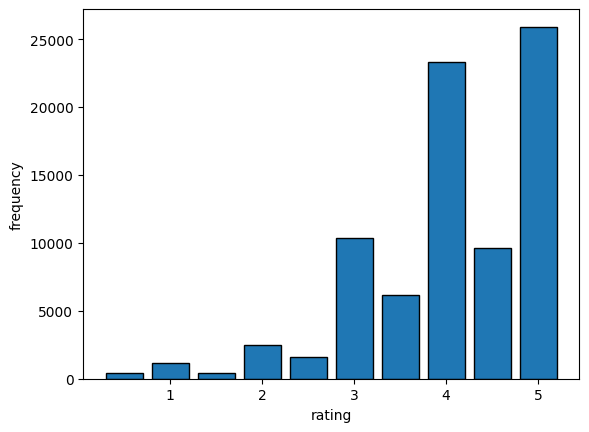

In [ ]:
#@title rating distributions of the most popular movie : Forrest Gump
top_rate=np.array(movies_struct[82])[:,1]

unique_values, counts = np.unique(top_rate, return_counts=True)

# Plot histogram
plt.bar(unique_values, counts, edgecolor='black',width=0.4)
plt.xlabel('rating')
plt.ylabel('frequency')
#plt.title('rating distribution of the most popular movies')
plt.savefig('fig13.pdf', format='pdf',bbox_inches='tight')

# Power Law

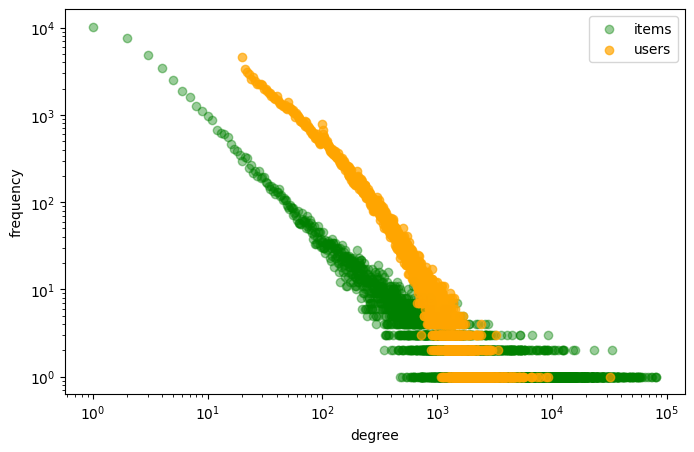

In [14]:

freq_user=data.groupby('userId')['rating'].count()
rank1=freq_user.value_counts().sort_index()


freq_items=data.groupby('movieId')['rating'].count()
rank2=freq_items.value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.scatter(rank2.index,rank2.values,color='green',alpha=0.4,label='items')
plt.scatter(rank1.index,rank1.values,color='orange',alpha=0.7,label='users')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()
plt.savefig('fig2.pdf', format='pdf',bbox_inches='tight')

#Practical 2

## Model that find Maximum likelihood  estimate for User + Item biases

In [ ]:
#@title Cost and RMSE functions : only users + item biases
def Loss(data_samples,b_u,b_i,lda,gma):
  error=0
  penalty=(b_u**2).sum()+(b_i**2).sum()  # user + item bias regularization
  for m,n,r in data_samples:
      error += (lda/2 )*(r-(b_u[m]+b_i[n]))**2  # sum over pairs of user_item__rating
  loss= error + (gma/2)*penalty
  return loss

def Rmse(data_samples,b_u,b_i):
  error=0
  for m,n,r in data_samples:
    error += (r-(b_u[m]+b_i[n]))**2  ## sum of square error
  return np.sqrt(1/len(data_samples)*error)



In [ ]:
#@title Learning algorithm (ALS) : only users + items biases
def Optimize_user_item_biases(lda=4,gma=1,iterations=100):

  user_biases = np.zeros((M))
  item_biases = np.zeros((N))
  rmse_history=[]
  loss_history=[]
  for i in tqdm(range(iterations)):

     # update users biases
    for m in range(M):
      bias=0
      item_counter=0
      for (n,r) in users_struct[m]:
        bias += lda*(r-item_biases[n])
        item_counter += 1
      bias = bias/(lda*item_counter + gma)
      user_biases[m]=bias

    # update item biases
    for n in range(N):
      bias=0
      user_counter=0
      for (m,r) in movies_struct[n]:
        bias += lda*(r-user_biases[m])
        user_counter += 1
      bias = bias/(lda*user_counter + gma)
      item_biases[n]=bias

    ## Loss history
    loss=Loss(samples,user_biases,item_biases,lda=lda,gma=gma)
    loss_history.append((i,loss))
    ## RMSE history
    error=Rmse(samples,user_biases,item_biases)
    rmse_history.append((i,error))

  return {'user_biases':user_biases,'item_biases':item_biases,'RMSE_train':rmse_history,'loss_train':loss_history}

In [ ]:
history=Optimize_user_item_biases(lda=4,gma=1,iterations=100)  ## result history for 50 iterations

100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


In [ ]:
#@title .
import pickle
path1='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_100_lbd1_gma0.pkl'
path2='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_100_lbd1_gma1.pkl'
path3='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_100_lbd4_gma1.pkl'

with open(path1, 'rb') as f:
    hist1 = pickle.load(f)
with open(path2, 'rb') as f:
    hist2 = pickle.load(f)
with open(path3, 'rb') as f:
    hist3= pickle.load(f)

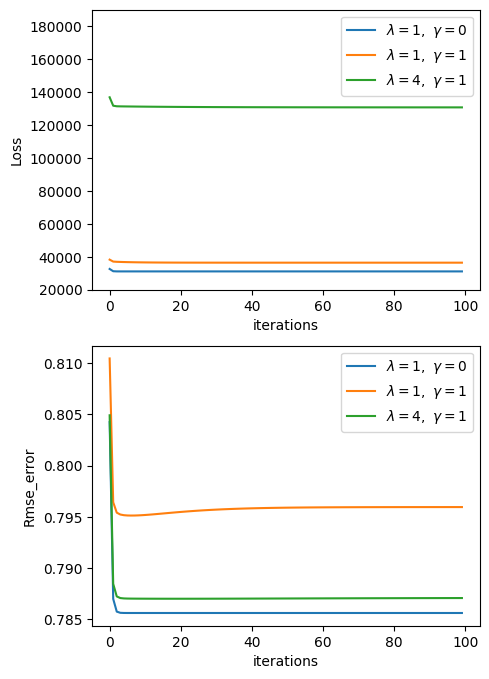

In [ ]:
#@title history plots : only users and items biases on the 100K dataset
fig,ax=plt.subplots(2,1,figsize=(5,8))
loss1=np.array(hist1['loss_train'])
rmse1=np.array(hist1['RMSE_train'])

loss2=np.array(hist2['loss_train'])
rmse2=np.array(hist2['RMSE_train'])

loss3=np.array(hist3['loss_train'])
rmse3=np.array(hist3['RMSE_train'])

ax[0].plot(loss1[:,0],loss1[:,1],label='$\lambda=1,\ \gamma=0$')
ax[0].plot(loss2[:,0],loss2[:,1],label='$\lambda=1,\ \gamma=1$')
ax[0].plot(loss3[:,0],loss3[:,1],label='$\lambda=4,\ \gamma=1$')
ax[0].set_xlabel('iterations');ax[0].set_ylabel('Loss')
ax[0].set_ylim(2e4,19e4)
ax[0].legend()
ax[1].plot(rmse1[:,0],rmse1[:,1],label='$\lambda=1,\ \gamma=0$')
ax[1].plot(rmse2[:,0],rmse2[:,1],label='$\lambda=1,\ \gamma=1$')
ax[1].plot(rmse3[:,0],rmse3[:,1],label='$\lambda=4,\ \gamma=1$')
ax[1].set_xlabel('iterations'); ax[1].set_ylabel('Rmse_error')
plt.legend()
# plt.suptitle('biases only : num_iter=100 0, lambda=1, gamma=0, tau=0.5)
plt.savefig('fig5.pdf', format='pdf',bbox_inches='tight')
plt.show()

## Likelihood estimate of user+item_bias + latent vector

In [ ]:
#@title Cost and RMSE functions :  users + item biases + latent vectors
def Loss_2(data_samples,b_u,b_i,U,V,lda,gma,tau):
  error=0
  bias_penalty=(b_u**2).sum()+(b_i**2).sum()  # user + item bias regularization
  vector_penalty=np.sum(U**2)+np.sum(V**2)
  for m,n,r in data_samples:
      error += (lda/2 )*(r-(b_u[m]+b_i[n]+U[m,:].dot(V[n,:].T)))**2  # sum over pairs of user_item__rating
  loss= error + (gma/2)*bias_penalty+(tau/2)*vector_penalty
  return loss

def Rmse_2(data_samples,b_u,b_i,U,V):
  error=0
  for m,n,r in data_samples:
    error += (r-(b_u[m]+b_i[n]+ U[m,:].dot(V[n,:].T)))**2  ## sum of square error
  return np.sqrt(1/len(data_samples)*error)

In [ ]:
#@title Learning algorithm (ALS) : only users + items biases+latent vectors

def Optimize_user_item_biases_latent(lda,gma,tau,iterations,latent_dim):

  user_biases = np.zeros((M))
  item_biases = np.zeros((N))
  user_vectors=np.random.normal(scale=1./latent_dim, size=(M, latent_dim))
  item_vectors= np.random.normal(scale=1./latent_dim, size=(N,latent_dim))
  rmse_history=[]
  loss_history=[]
  for i in tqdm(range(iterations)):

     # update user biases & user latent vectors
    for m in range(M):
      a,b=0,0
      bias=0
      item_counter=0
      #update user biases
      for (n,r) in users_struct[m]:
        bias += lda*(r-(user_vectors[m,:].dot(item_vectors[n,:].T)+item_biases[n]))
        item_counter += 1
      bias = bias/(lda*item_counter + gma)
      user_biases[m]=bias

      # update user latent vectors
      for (n,r) in users_struct[m]:
        v=item_vectors[n,:][:,np.newaxis]
        a += v.dot(v.T)
        b += (r-user_biases[m]-item_biases[n])*v
      c=np.linalg.inv(lda*a + np.diag(np.full(latent_dim,tau))).dot(lda*b)
      user_vectors[m,:]=c.flatten()
    # update item biases & item latent vectors
    for n in range(N):
      a,b=0,0
      bias=0
      user_counter=0
      # update item biases
      for (m,r) in movies_struct[n]:
        bias += lda*(r-(user_vectors[m,:].dot(item_vectors[n,:].T)+user_biases[m]))
        user_counter += 1
      bias = bias/(lda*user_counter + gma)
      item_biases[n]=bias
      #update item latent vectors
      for (m,r) in movies_struct[n]:
        u=user_vectors[m,:][:,np.newaxis]
        a += u.dot(u.T)
        b += (r-user_biases[m]-item_biases[n])*u
      c=np.linalg.inv(lda*a + np.diag(np.full(latent_dim,tau))).dot(lda*b)
      item_vectors[n,:]=c.flatten()

     ## Loss history
    loss=Loss_2(samples,user_biases,item_biases,user_vectors,item_vectors,lda=lda,gma=gma,tau=tau)
    loss_history.append((i,loss))
    ## RMSE history
    error=Rmse_2(samples,b_u=user_biases,b_i=item_biases,U=user_vectors,V=item_vectors)
    rmse_history.append((i,error))


  return {'user_biases':user_biases,'item_biases':item_biases,'RMSE_train':rmse_history,'loss_train':loss_history,'user_vectors':user_vectors,'item_vectors':item_vectors}

In [ ]:
history=Optimize_user_item_biases_latent(lda=4,gma=1,tau=1,iterations=1,latent_dim=3)

100%|██████████| 100/100 [08:34<00:00,  5.14s/it]


In [ ]:
#@title .
import pickle
path1='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_k10_lda1_gma0_tau0.5.pkl'
path2='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_k20_lda1_gma0_tau0.5.pkl'
path3='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/small_movieslens/small_k4_lda1_gma0_tau0.5.pkl'

with open(path1, 'rb') as f:
    hist1 = pickle.load(f)
with open(path2, 'rb') as f:
    hist2 = pickle.load(f)
with open(path3, 'rb') as f:
    hist3= pickle.load(f)

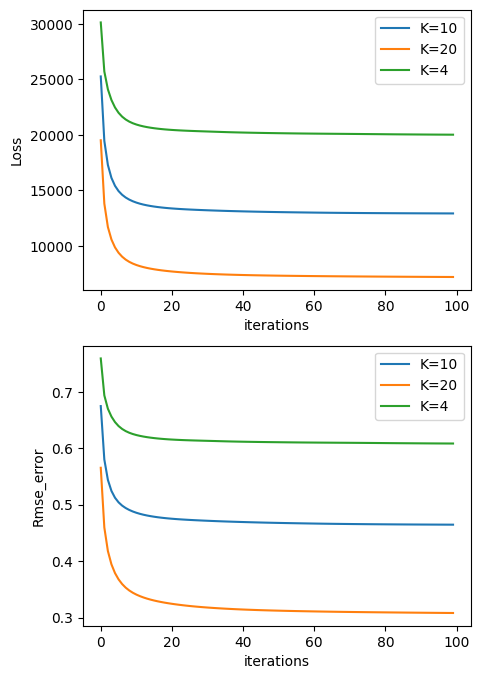

In [ ]:
#@title history plots : "only users + items biases +latent vectors " on the 100K dataset
fig,ax=plt.subplots(2,1,figsize=(5,8))
loss1=np.array(hist1['train_loss'])
rmse1=np.array(hist1['RMSE_train'])

loss2=np.array(hist2['train_loss'])
rmse2=np.array(hist2['RMSE_train'])

loss3=np.array(hist3['train_loss'])
rmse3=np.array(hist3['RMSE_train'])

ax[0].plot(loss1[:,0],loss1[:,1],label='K=10')
ax[0].plot(loss2[:,0],loss2[:,1],label='K=20')
ax[0].plot(loss3[:,0],loss3[:,1],label='K=4')
ax[0].set_xlabel('iterations');ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(rmse1[:,0],rmse1[:,1],label='K=10')
ax[1].plot(rmse2[:,0],rmse2[:,1],label='K=20')
ax[1].plot(rmse3[:,0],rmse3[:,1],label='K=4')
ax[1].set_xlabel('iterations'); ax[1].set_ylabel('Rmse_error')
plt.legend()
# plt.suptitle('biases only : num_iter=100 0, lambda=1, gamma=0, tau=0.5)
plt.savefig('fig6.pdf', format='pdf',bbox_inches='tight')
plt.show()

#Practical 3


## Split the MovieLens 25M dataset into a training and a test set.


In [ ]:
#@title Splitting function

def train_test_split( ):

  size=round(0.2*len(samples)) # 20% of the entire dataset
  random.shuffle(samples)      # shuffle the dataset

  test_samples=samples[:size]  # list of test samples.
  train_samples=samples[size:] # list of training samples.


  train_user_struct = [[] for i in range(M)] # list of list of tuple (item_index ,rating) for each user "m"
  train_item_struct= [[] for i in range(N)] # list of list of tuple (user_index ,rating) for each item "n"
  for (user_index, movie_index, rating) in train_samples:
    train_user_struct[user_index].append((movie_index, rating))
    train_item_struct[movie_index].append((user_index, rating))

  return  {'train_samples':train_samples,'test_samples':test_samples,
          'user_struct':train_user_struct,'item_struct':train_item_struct}


In [ ]:
#@title load the training and test samples

data_prep=train_test_split()

train_samples=data_prep['train_samples']  # training samples list version
test_samples=data_prep['test_samples']    # testing samples list version
train_user_struct=data_prep['user_struct'] # train "users index" samples structured version
train_item_struct=data_prep['item_struct'] # train " item itndex" samples structured version

In [ ]:
#@title use the training set for the optimization process (ALS) : 100K dataset

def Optimize_user_item_biases_latent_2(iterations,latent_dim=3,lda=4,gma=1,tau=1):

  user_biases = np.zeros((M))
  item_biases = np.zeros((N))
  user_vectors=np.random.normal(scale=1./latent_dim, size=(M, latent_dim))
  item_vectors= np.random.normal(scale=1./latent_dim, size=(N,latent_dim))
  rmse_history=[]
  loss_history=[]
  test_loss_history=[]
  test_rmse_history=[]

  for i in tqdm(range(iterations)):

     # update user biases & user latent vectors
    for m in range(M):
      a,b=0,0
      bias=0
      item_counter=0
      #update user biases
      for (n,r) in users_struct[m]:
        bias += lda*(r-(user_vectors[m,:].dot(item_vectors[n,:].T)+item_biases[n]))
        item_counter += 1
      bias = bias/(lda*item_counter + gma)
      user_biases[m]=bias

      # update user latent vectors
      for (n,r) in train_user_struct[m]:
        v=item_vectors[n,:][:,np.newaxis]
        a += v.dot(v.T)
        b += (r-user_biases[m]-item_biases[n])*v
      c=np.linalg.inv(lda*a + np.diag(np.full(latent_dim,tau))).dot(lda*b)
      user_vectors[m,:]=c.flatten()
    # update item biases & item latent vectors
    for n in range(N):
      a,b=0,0
      bias=0
      user_counter=0
      # update item biases
      for (m,r) in train_item_struct[n]:
        bias += lda*(r-(user_vectors[m,:].dot(item_vectors[n,:].T)+user_biases[m]))
        user_counter += 1
      bias = bias/(lda*user_counter + gma)
      item_biases[n]=bias
      #update item latent vectors
      for (m,r) in movies_struct[n]:
        u=user_vectors[m,:][:,np.newaxis]
        a += u.dot(u.T)
        b += (r-user_biases[m]-item_biases[n])*u
      c=np.linalg.inv(lda*a + np.diag(np.full(latent_dim,tau))).dot(lda*b)
      item_vectors[n,:]=c.flatten()

     ## Loss history
    loss=Loss_2(train_samples,user_biases,item_biases,user_vectors,item_vectors,lda=lda,gma=gma,tau=tau)
    loss_history.append((i,loss))

    test_loss=Loss_2(test_samples,user_biases,item_biases,user_vectors,item_vectors,lda=lda,gma=gma,tau=tau)
    test_loss_history.append((i,test_loss))

    ## RMSE history
    error=Rmse_2(train_samples,b_u=user_biases,b_i=item_biases,U=user_vectors,V=item_vectors)
    rmse_history.append((i,error))

    # test RMSE
    test_error=Rmse_2(test_samples,b_u=user_biases,b_i=item_biases,U=user_vectors,V=item_vectors)
    test_rmse_history.append((i,test_error))

  return {'user_biases':user_biases,'item_biases':item_biases,'user_vectors':user_vectors,'item_vectors':item_vectors,'RMSE_train':rmse_history,'train_loss':loss_history,
         'RMSE_test':test_rmse_history,'test_loss':test_loss_history}

In [ ]:
history=Optimize_user_item_biases_latent_2(iterations=100)

100%|██████████| 100/100 [06:11<00:00,  3.71s/it]


Text(0.5, 0.98, 'biases + latent vectors history: num_iter=100 , lambda=4, gamma=1,tau=1,latent_dim=3')

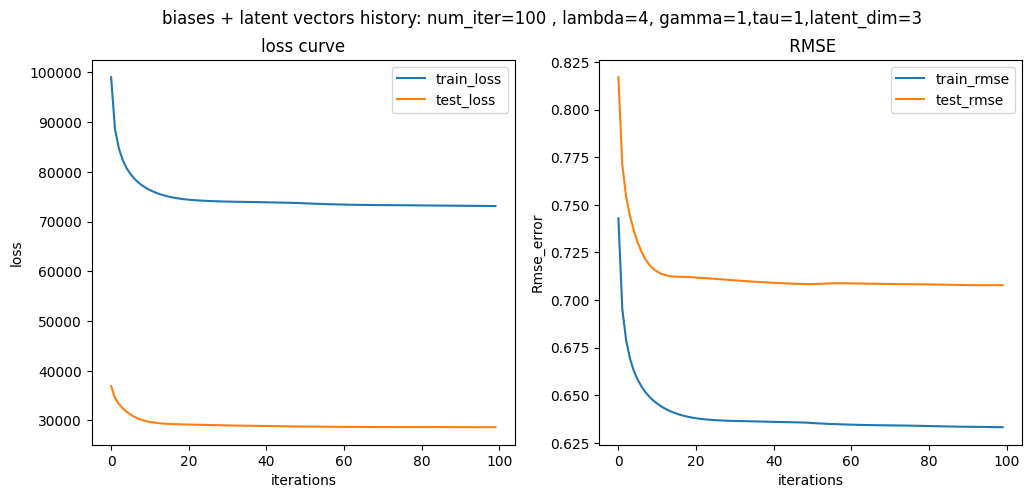

In [ ]:
#@title training history on the 100K MoviesLens dataset
fig,ax=plt.subplots(1,2,figsize=(12,5))
loss=np.array(history['train_loss'])
rmse=np.array(history['RMSE_train'])
test_loss=np.array(history['test_loss'])
rmse_test=np.array(history['RMSE_test'])
ax[0].plot(loss[:,0],loss[:,1],label='train_loss')
ax[0].plot(test_loss[:,0],test_loss[:,1],label='test_loss')
ax[0].set_xlabel('iterations');ax[0].set_ylabel('loss')
ax[0].set_title('loss curve')
ax[0].legend()
ax[1].plot(rmse[:,0],rmse[:,1],label='train_rmse')
ax[1].plot(rmse_test[:,0],rmse_test[:,1],label='test_rmse')
ax[1].set_xlabel('iterations'); ax[1].set_ylabel('Rmse_error')
ax[1].set_title(' RMSE')
ax[1].legend()
plt.suptitle('biases + latent vectors history: num_iter=100 , lambda=4, gamma=1,tau=1,latent_dim=3')

# Optimization from the 25M MoviesLens Dataset

In [ ]:
#@title Vectorized version of the optimization algorithm

# vectorized Loss function
def Loss_2(data_samples, b_u, b_i, U, V, lda, gma, tau):
    m_indices=np.array([m for m, n, r in data_samples])
    ratings=np.array([r for m,n,r in data_samples])
    n_indices=np.array([n for m,n,r in data_samples])

    r_predicted = np.sum(U[m_indices] * V[n_indices], axis=1) + b_u[m_indices] + b_i[n_indices]
    error = np.sum((ratings - r_predicted) ** 2)
    bias_penalty = np.sum(b_u ** 2) + np.sum(b_i ** 2)
    vector_penalty = np.sum(U ** 2) + np.sum(V ** 2)
    loss = (lda / 2) * error + (gma / 2) * bias_penalty + (tau / 2) * vector_penalty
    return loss

# vectorized RMSE function
def Rmse_2(data_samples, b_u, b_i, U, V):
    m_indices=np.array([m for m, n, r in data_samples])
    ratings=np.array([r for m,n,r in data_samples])
    n_indices=np.array([n for m,n,r in data_samples])

    r_predicted = np.sum(U[m_indices] * V[n_indices], axis=1) + b_u[m_indices] + b_i[n_indices]
    error = np.sum((ratings - r_predicted) ** 2)
    return np.sqrt(error / len(data_samples))


# Vectorized ALS function

def Optimize_user_item_biases_latent_3(iterations, latent_dim=2, lda=1, gma=0, tau=1):

    user_biases = np.zeros((M))
    item_biases = np.zeros((N))
    user_vectors = np.random.normal(scale=1. / np.sqrt(latent_dim), size=(M, latent_dim))
    item_vectors = np.random.normal(scale=1. / np.sqrt(latent_dim), size=(N, latent_dim))
    rmse_history = []
    loss_history = []
    #test_loss_history = []
    #test_rmse_history = []

    for i in tqdm(range(iterations)):

        # Update user biases & user latent vectors
        for m in range(M):
            user_items = users_struct[m]
            ratings = np.array([r for n, r in user_items])
            item_indices = [n for n, r in user_items]
            item_vectors_m = item_vectors[item_indices]

            user_biases[m] = np.sum(ratings - np.dot(item_vectors_m, user_vectors[m]) - item_biases[item_indices])/(lda*len(item_indices)+gma)

            a = np.dot(item_vectors_m.T, item_vectors_m)
            b = np.dot(item_vectors_m.T, (ratings - user_biases[m] - item_biases[item_indices])[:, np.newaxis])

            c = np.linalg.inv(lda * a + tau*np.eye(latent_dim)).dot(lda * b)
            user_vectors[m] = c.flatten()

        # Update item biases & item latent vectors
        for n in range(N):
            movie_users = movies_struct[n]
            ratings = np.array([r for m, r in movie_users])
            user_indices = [m for m, r in movie_users]
            user_vectors_n = user_vectors[user_indices]

            item_biases[n] = np.sum(ratings - np.dot(user_vectors_n, item_vectors[n]) - user_biases[user_indices])/(lda*len(user_indices)+gma)

            a = np.dot(user_vectors_n.T, user_vectors_n)
            b = np.dot(user_vectors_n.T, (ratings - user_biases[user_indices] - item_biases[n])[:, np.newaxis])

            c = np.linalg.inv(lda * a + tau*np.eye(latent_dim)).dot(lda * b)
            item_vectors[n] = c.flatten()

        # Loss history
        loss = Loss_2(samples, user_biases, item_biases, user_vectors, item_vectors, lda=lda, gma=gma, tau=tau)
        loss_history.append((i, loss))

        # RMSE history
        error = Rmse_2(samples, b_u=user_biases, b_i=item_biases, U=user_vectors, V=item_vectors)
        rmse_history.append((i, error))

    return {'user_biases': user_biases, 'item_biases': item_biases, 'user_vectors': user_vectors,
            'item_vectors': item_vectors, 'RMSE_train': rmse_history, 'train_loss': loss_history}


In [ ]:
#@title training on the full 25 million ratings
history=Optimize_user_item_biases_latent_3(iterations=100)

In [104]:
#@title .
path1='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_all_25M_k10_it100.pkl'
path2='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_all_25M_k4_it100.pkl'
path3='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_all_25M_k2_it100.pkl'

with open(path1, 'rb') as f:
    hist1 = pickle.load(f)
with open(path2, 'rb') as f:
    hist2 = pickle.load(f)
with open(path3, 'rb') as f:
    hist3= pickle.load(f)

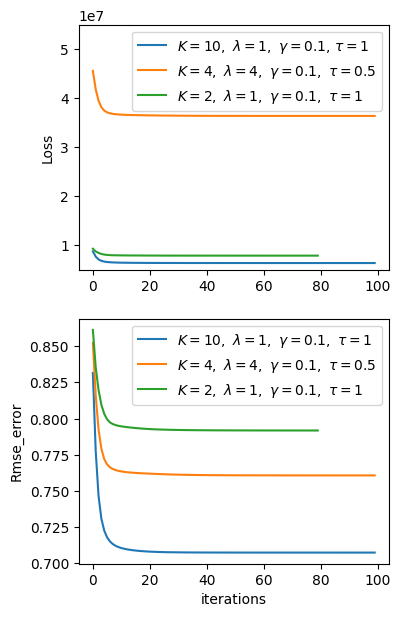

In [109]:
#@title Errors on the  test set for various values of hyperparameters
fig,ax=plt.subplots(2,1,figsize=(4,7))
loss1=np.array(hist1['train_loss'])
rmse1=np.array(hist1['RMSE_train'])

loss2=np.array(hist2['train_loss'])
rmse2=np.array(hist2['RMSE_train'])

loss3=np.array(hist3['train_loss'])
rmse3=np.array(hist3['RMSE_train'])

ax[0].plot(loss1[:,0],loss1[:,1],label='$K=10,\ \lambda=1,\ \gamma=0.1$, $\\tau=1$')
ax[0].plot(loss2[:,0],loss2[:,1],label='$K=4,\ \lambda=4,\ \gamma=0.1,\ \\tau=0.5$')
ax[0].plot(loss3[:,0],loss3[:,1],label='$K=2,\ \lambda=1,\ \gamma=0.1,\ \\tau=1$')
#ax[0].set_xlabel('iterations')
ax[0].set_ylabel('Loss')
ax[0].set_ylim(0.5e7,5.5e7)
ax[0].legend()
ax[1].plot(rmse1[:,0],rmse1[:,1],label='$K=10,\ \lambda=1,\ \gamma=0.1,\ \\tau=1$')
ax[1].plot(rmse2[:,0],rmse2[:,1],label='$K=4,\ \lambda=4,\ \gamma=0.1,\ \\tau=0.5$')
ax[1].plot(rmse3[:,0],rmse3[:,1],label='$K=2,\ \lambda=1,\ \gamma=0.1,\ \\tau=1$')
ax[1].set_xlabel('iterations'); ax[1].set_ylabel('Rmse_error')

plt.legend()
# plt.suptitle('biases only : num_iter=100 0, lambda=1, gamma=0, tau=0.5)
plt.savefig('fig8.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
#@title .
path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_all_25M_k10_it100.pkl'
with open(path, 'rb') as f:
    history = pickle.load(f)

In [ ]:
#@title training on the full 25 million ratings with the choosen hyperparameters
history=Optimize_user_item_biases_latent_3(iterations=100)

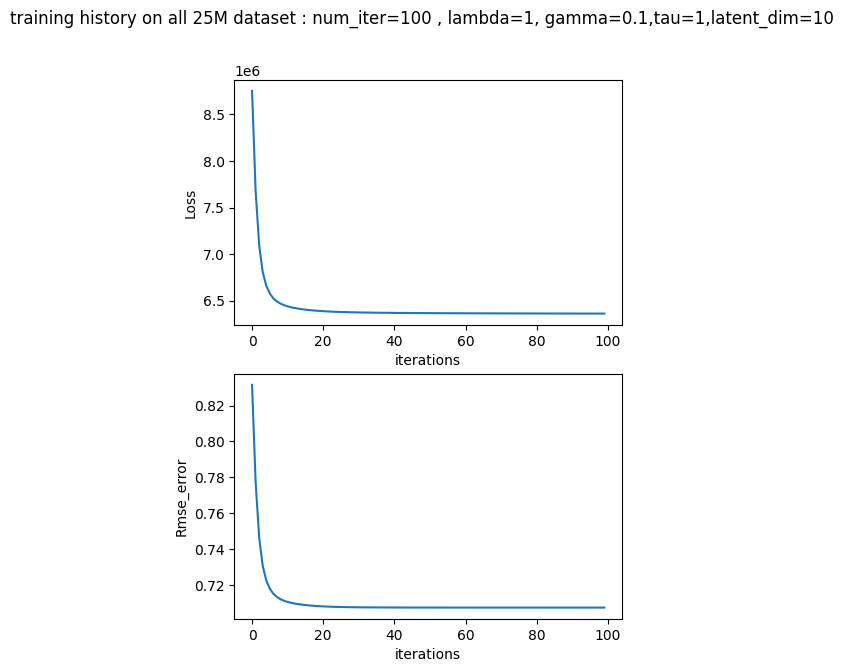

In [18]:
#@title plot the training loss and RMSE

fig,ax=plt.subplots(2,1,figsize=(5,7))
loss=np.array(history['train_loss'])
rmse=np.array(history['RMSE_train'])

ax[0].plot(loss[:,0],loss[:,1])
ax[0].set_xlabel('iterations');ax[0].set_ylabel('Loss')
#ax[0].set_title('loss curve')
ax[1].plot(rmse[:,0],rmse[:,1])
ax[1].set_xlabel('iterations'); ax[1].set_ylabel('Rmse_error')
#ax[1].set_title(' RMSE')
plt.suptitle('training history on all 25M dataset : num_iter=100 , lambda=1, gamma=0.1,tau=1,latent_dim=10')
plt.show()

## Recommendations

In [ ]:
#@title user score function
def score_for_dummy_user(user_data,factor=0.05,latent_dim=10,iterations=150,lda=5,gma=0.1,tau=1):

  score_for_items=np.zeros((M))
  user_trait_vect=np.zeros((latent_dim))#np.random.normal(scale=1./np.sqrt(latent_dim), size=(latent_dim) )
  user_bias=0
  item_trait_vect=history['item_vectors']
  item_biases=history['item_biases']

  for i in range(iterations):
     # update user bias & user latent vector
    a,b=0,0
    bias=0
    item_counter=0
      #update user biases
    for (n,r) in user_data:
      bias += lda*(r-(user_trait_vect.dot(item_trait_vect[n,:])+item_biases[n]))
      item_counter += 1
    bias = bias/(lda*item_counter + gma)
    user_bias=bias

      # update user latent vectors
    for (n,r) in user_data:
      v=item_trait_vect[n,:][:,np.newaxis]
      a += v.dot(v.T)
      b += (r-user_bias-item_biases[n])*v
    c=np.linalg.inv(lda*a + np.diag(np.full(latent_dim,tau))).dot(lda*b)
    user_trait_vect=c.flatten()
  # compute the score
  user_trait_vect[np.newaxis,:]
  user_score=user_trait_vect.dot(item_trait_vect.T) + factor*item_biases

  return user_score

In [ ]:
#@title recommendation for dummy user based on his scores

def recommender(user_data,n=20,factor=0.02):
  score=score_for_dummy_user(user_data,factor)
  higher_score_index=np.argsort(score)[-n:]          # get the first n movies index with the highest scores
  recommend_id=items[list(higher_score_index)]      # get the corresponding moviesId
  recommendations=movies[['title','genres']][movies['movieId'].isin(recommend_id)] # track the movies' title and genres
  return recommendations

In [ ]:
#@title dummy user
#create a dummy user that rate "lord of the rings" by 5 stars and make recommentadion
index=np.where(items==4993)[0][0]       # movies index in list of items Id
print(movies[['title','genres']][movies['movieId']==4993]) # corresponding movies ('Lord of the rings')

print('')
dum_user_data=[(202,5)]                # dummy user data (item_index, rating)

print('recommended movies:')
print('')
recommender(user_data=dum_user_data,n=20,factor=0.02) # top first 20 recommendations

                                                  title             genres
4887  Lord of the Rings: The Fellowship of the Ring,...  Adventure|Fantasy

recommended movies:



,title,genres
257,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1166,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1179,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
2537,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
4887,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5270,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
5840,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7028,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
7742,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX
9952,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi


## Polarizing movies

In [ ]:


item_trait_vector=history['item_vectors']       # get the item trait vectors
norms=np.linalg.norm(item_trait_vector, axis=1) # compute the norm of all the items embeddings

index=np.argmax(norms)                         # get the index associate to the highest norm

Id=items[index]                                # corresponding movie Id

title=movies[movies['movieId']==Id]             # title

print('the most polirizing movie is:')
print('')

title

the most polirizing movie is:



,movieId,title,genres
18822,98203,"Twilight Saga: Breaking Dawn - Part 2, The (2012)",Adventure|Drama|Fantasy|Romance|IMAX


In [ ]:
# Sort the indices based on the values in descending order
sorted_indices= sorted(range(len(norms)), key=lambda i: norms[i], reverse=True)

# Get the indices of the top 5 highest frequences
top_5_indices = sorted_indices[:5]

#corresponding Id
Id=items[top_5_indices]
print('the 5 most polarizing movies in the dataset:')
print('')
movies[['title','genres']][movies['movieId'].isin(Id)]

the 5 most popular movies in the dataset:



,title,genres
12826,Twilight (2008),Drama|Fantasy|Romance|Thriller
13993,"Twilight Saga: New Moon, The (2009)",Drama|Fantasy|Horror|Romance|Thriller
14867,"Twilight Saga: Eclipse, The (2010)",Fantasy|Romance|Thriller|IMAX
17370,"Twilight Saga: Breaking Dawn - Part 1, The (2011)",Adventure|Drama|Fantasy|Romance
18822,"Twilight Saga: Breaking Dawn - Part 2, The (2012)",Adventure|Drama|Fantasy|Romance|IMAX


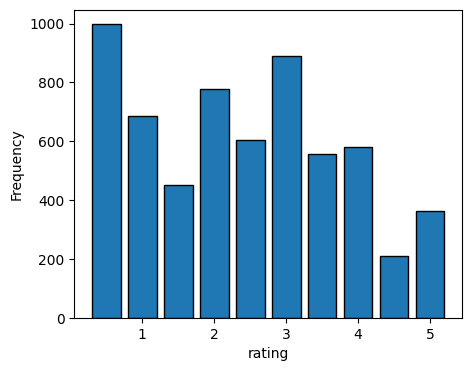

In [ ]:
#@title rating distributions of the most polirizing movies

top_rate=np.array(movies_struct[3312])[:,1]
unique_values, counts = np.unique(top_rate, return_counts=True)
plt.subplots(figsize=(5,4))
# Plot histogram
plt.bar(unique_values, counts, edgecolor='black',width=0.4)
plt.xlabel('rating')
plt.ylabel('Frequency')
# plt.title('rating distribution of the most polirizing movie')
plt.savefig('fig11.pdf', format='pdf',bbox_inches='tight')

## 2D item embeddings

In [ ]:
#@title .
path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_all_25M_k2_it100.pkl'
with open(path, 'rb') as f:
    history_2d= pickle.load(f)


In [22]:
#@title mapping functions

# movie Id to index

def itemId_to_index(item_Id):
  """item_Id (list):list of item Id """
  list=[np.where(items==Id)[0][0] if Id in items else -1 for Id in item_Id]
  return [x for x in list if x!=-1]
# genre to movies Id

def genre_to_ItemsId (genre):
  """ genre (string): movies genre"""
  return list(movies['movieId'][movies['genres'].str.contains(genre)].values)

# movie title to index

def title_to_index(title):
  """title (string): movie title"""
  Id=list(movies['movieId'][movies['title'].str.contains(title)].values)
  return itemId_to_index(Id)

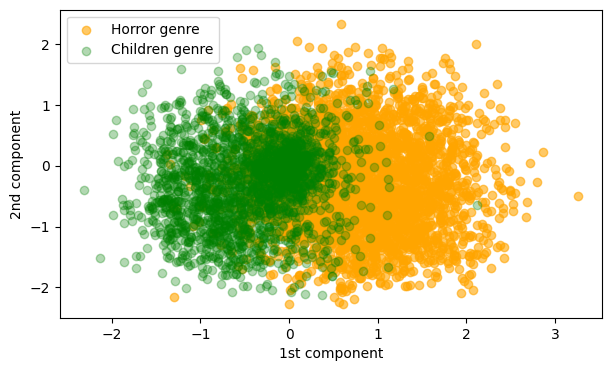

In [47]:
Horror_movies_Id= genre_to_ItemsId('Horror')

Children_movies_Id=genre_to_ItemsId ('Children')

index_Horror_movies=itemId_to_index(Horror_movies_Id)
index_Children_movies=itemId_to_index(Children_movies_Id)

item_vectors=history_2d['item_vectors']

horror_genre_embedding=item_vectors[index_Horror_movies]
children_genre_embedding=item_vectors[index_Children_movies]

fig,ax=plt.subplots(figsize=(7,4))
ax.scatter(horror_genre_embedding[:,0],horror_genre_embedding[:,1],c='orange',label='Horror genre',alpha=0.6)
ax.set_xlabel('1st component');ax.set_ylabel('2nd component')
ax.scatter(children_genre_embedding[:,0],children_genre_embedding[:,1],c='green',label='Children genre',alpha=0.3)
#ax.set_title('2D items embeddings plot')
ax.legend()
plt.savefig('fig9.pdf', format='pdf',bbox_inches='tight')
plt.show()

# Practical 4

##Feature embeddings

In [24]:
#@title genres list
genres=['Action',
'Adventure','Animation', 'Children',
'Comedy', 'Crime','Documentary','Drama','Fantasy',
'Film-Noir',
'Horror',
'Musical',
'Mystery',
'Romance'
,'Sci-Fi',
'Thriller',
'War',
'Western',
'(no genres listed)']

L=len(genres)

In [51]:
features=movies['genres'].str.split('|')
movies['features']=movies['genres'].str.split('|')
movies['features'].head(10)

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: features, dtype: object

In [52]:
#@title Encode the features
def encode(x,genres=genres):
  return [int(any(sub in string for sub in x)) for string in genres]


movies['encode_features']=movies['features'].apply(lambda x:encode(x))
movies['encode_features'].head(5)


def map_index_to_features(index):
  Id=items[index]
  return movies['encode_features'][movies['movieId']==Id].values[0]


encoded_features=np.array([map_index_to_features(j) for j in range(N)])

0    [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
3    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: encode_features, dtype: object

In [ ]:
#@title vectorized Cost and RMSE functions : "user+ Item biases + latent vectors + features information"

def Loss_2(data_samples, b_u, b_i, U, V, lda, gma, tau,features,encoded):
  m_indices=np.array([m for m, n, r in data_samples])
  ratings=np.array([r for m,n,r in data_samples])
  n_indices=np.array([n for m,n,r in data_samples])
  eps=1e-15
  F_n=np.sum(encoded,axis=1)[:,np.newaxis]
  f=(1/(np.sqrt(F_n)+eps))*(np.dot(encoded,features))
  V_f=V-f

  vector_penalty = np.sum(U ** 2) + np.sum(V_f ** 2)
  bias_penalty = np.sum(b_u ** 2) + np.sum(b_i ** 2)
  features_penalty=np.sum(features**2)

  r_predicted = np.sum(U[m_indices] * V[n_indices], axis=1) + b_u[m_indices] + b_i[n_indices]
  error = np.sum((ratings - r_predicted) ** 2)
  loss = (lda / 2) * error + (gma / 2) * bias_penalty + (tau / 2) * vector_penalty+(tau/2)*features_penalty
  return loss

# vectorized RMSE function
def Rmse_2(data_samples, b_u, b_i, U, V):
  m_indices=np.array([m for m, n, r in data_samples])
  ratings=np.array([r for m,n,r in data_samples])
  n_indices=np.array([n for m,n,r in data_samples])

  r_predicted = np.sum(U[m_indices] * V[n_indices], axis=1) + b_u[m_indices] + b_i[n_indices]
  error = np.sum((ratings - r_predicted) ** 2)
  return np.sqrt(error / len(data_samples))

In [ ]:
#@title Vectorized learning algorithm( ALS): " user+ Item biases + latent vectors + features information"

def Optimize_user_item_biases_latent_4(iterations,encoded, latent_dim=10, lda=1, gma=0, tau=1):

  user_biases = np.zeros((M))
  item_biases = np.zeros((N))
  user_vectors = np.random.normal(scale=1. / np.sqrt(latent_dim), size=(M, latent_dim))
  item_vectors = np.random.normal(scale=1. / np.sqrt(latent_dim), size=(N, latent_dim))
  rmse_history = []
  loss_history = []
  features_vector=np.random.normal(scale=1/np.sqrt(latent_dim),size=(L, latent_dim))
  eps=1e-15
  #test_loss_history = []
  #test_rmse_history = []

  for i in tqdm(range(iterations)):

      # Update user biases & user latent vectors
      for m in range(M):
          user_items = users_struct[m]
          ratings = np.array([r for n, r in user_items])
          item_indices = [n for n, r in user_items]
          item_vectors_m = item_vectors[item_indices]

          user_biases[m] = np.sum(ratings - np.dot(item_vectors_m, user_vectors[m]) - item_biases[item_indices])/(lda*len(item_indices)+gma)

          a = np.dot(item_vectors_m.T, item_vectors_m)
          b = np.dot(item_vectors_m.T, (ratings - user_biases[m] - item_biases[item_indices])[:, np.newaxis])

          c = np.linalg.inv(lda * a + tau*np.eye(latent_dim)).dot(lda * b)
          user_vectors[m] = c.flatten()

      # Update item biases & item latent vectors
      for n in range(N):
          movie_users = movies_struct[n]
          ratings = np.array([r for m, r in movie_users])
          user_indices = [m for m, r in movie_users]
          user_vectors_n = user_vectors[user_indices]

          item_biases[n] = np.sum(ratings - np.dot(user_vectors_n, item_vectors[n]) - user_biases[user_indices])/(lda*len(user_indices)+gma)

          a = np.dot(user_vectors_n.T, user_vectors_n)
          F_n=np.sum(encoded[n])
          f=(tau/(np.sqrt(F_n)+eps))*np.dot(encoded[n],features_vector)
          b = (lda*np.dot(user_vectors_n.T, (ratings - user_biases[user_indices] - item_biases[n]))+f)[:, np.newaxis]
          c = np.linalg.inv(lda * a + tau*np.eye(latent_dim)).dot(b)
          item_vectors[n] = c.flatten()

      for l in range(L):
         mask=encoded[:,l]==1
         f_l=encoded[mask]
         v_l=item_vectors[mask]
         F_n=np.sum(f_l,axis=1)[:,np.newaxis]
         f_l[:,l]=0
         features_vector[l]=np.sum(v_l*(1/(np.sqrt(F_n)+eps))-(1/(F_n+eps))*(np.dot(f_l,features_vector)),axis=0)/(np.sum(1/F_n)-1)

      # Loss history
      loss = Loss_2(samples, user_biases, item_biases, user_vectors, item_vectors,encoded=encoded,features=features_vector,lda=lda, gma=gma, tau=tau)
      loss_history.append((i, loss))

      # RMSE history
      error = Rmse_2(samples, b_u=user_biases, b_i=item_biases, U=user_vectors, V=item_vectors)
      rmse_history.append((i, error))

  return {'user_biases': user_biases, 'item_biases': item_biases, 'user_vectors': user_vectors,
          'item_vectors': item_vectors, 'RMSE_train': rmse_history, 'train_loss': loss_history,'features_vector':features_vector}


In [ ]:
#@title training  with K=2 ( dimension of the latent space)
history_2d_emb=Optimize_user_item_biases_latent_4(iterations=100,encoded=encoded_features,latent_dim=2)

In [20]:
#@title plot the 2D features embedding
path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_25M_embedding.pkl'
with open(path, 'rb') as f:
    history_2d_emb= pickle.load(f)

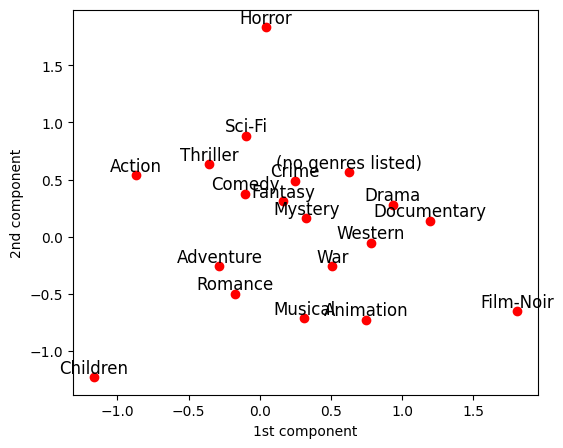

In [68]:
feature_vector=history_2d_emb['features_vector']

f_1,f_2=feature_vector[:,0],feature_vector[:,1]

plt.figure(figsize=(6,5))
plt.scatter(f_1,f_2,color='red',alpha=1 )
plt.xlabel('1st component')
plt.ylabel('2nd component')
#plt.title('2D feature embeddings')
# Add text annotations
for i, label in enumerate(genres):
    plt.text(f_1[i], f_2[i], label, fontsize=12, ha='center', va='bottom')
plt.savefig('fig15.pdf', format='pdf',bbox_inches='tight')

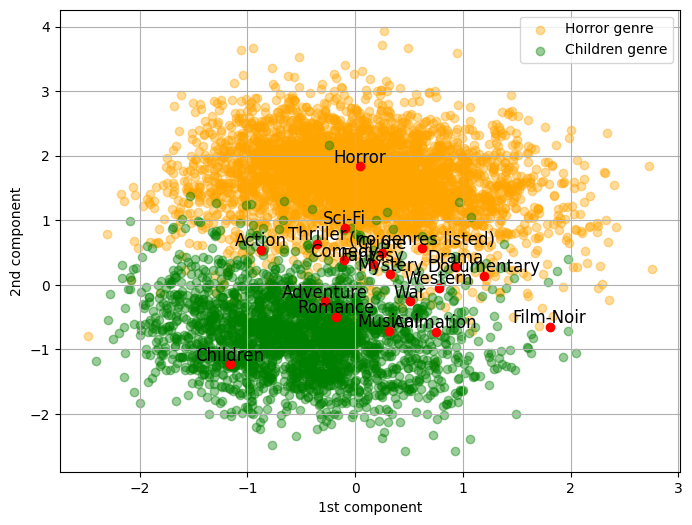

In [25]:
#@title Overlay the 2D items embedding

feature_vector=history_2d_emb['features_vector']

f_1,f_2=feature_vector[:,0],feature_vector[:,1]

Horror_movies_Id= genre_to_ItemsId('Horror')

Children_movies_Id=genre_to_ItemsId ('Children')

index_Horror_movies=itemId_to_index(Horror_movies_Id)
index_Children_movies=itemId_to_index(Children_movies_Id)

item_vectors=history_2d_emb['item_vectors']

horror_genre_embedding=item_vectors[index_Horror_movies]
children_genre_embedding=item_vectors[index_Children_movies]

plt.figure(figsize=(8,6))
plt.scatter(horror_genre_embedding[:,0],horror_genre_embedding[:,1],c='orange',label='Horror genre',alpha=0.4)
plt.scatter(children_genre_embedding[:,0],children_genre_embedding[:,1],c='green',label='Children genre',alpha=0.4)

plt.scatter(f_1,f_2,color='red',alpha=1 )
# Add text annotations
for i, label in enumerate(genres):
    plt.text(f_1[i], f_2[i], label, fontsize=12, ha='center', va='bottom')

plt.legend()

# plt.title('2D feature embeddings & items embeddings')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.grid(True)
plt.savefig('fig16.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [ ]:
#@title recommendation with features embeddings included
path='/content/drive/MyDrive/Shortcut to courses materials/Applied Machine learning at Scale/data structured/history_25M_k10_it100_embeddings.pkl'
with open(path, 'rb') as f:
    history= pickle.load(f)


In [ ]:
history_2d_emb=Optimize_user_item_biases_latent_4(iterations=100,encoded=encoded_features,latent_dim=20)

In [ ]:
#@title dummy user  rated "Children" genre movie .
g=genre_to_ItemsId ('Children')       # 'Children' movies genre
list_index=itemId_to_index(g)
index=list_index[0]                   # index of the chosen movie

print(movies[['title','genres']][movies['movieId']==g[0]]) # corresponding movies ('Toy Story')
print('')

dummy_user=[(index,5)]

print('first 20 Recommended movies')
print('')
recommender(user_data=dummy_user,n=20,factor=0.02)

              title                                       genres
0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy

first 20 Recommended movies



,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
33,Babe (1995),Children|Drama
359,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
580,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,Pinocchio (1940),Animation|Children|Fantasy|Musical
999,Cinderella (1950),Animation|Children|Fantasy|Musical|Romance
1006,Dumbo (1941),Animation|Children|Drama|Musical
1992,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance
